In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# O csv é sobre as músicas mais escutadas em 2023
df = pd.read_csv('spotify-2023.csv', encoding='latin1')

In [5]:
# Ver o arquivo
print(df.head())

# Ver em colunas separdas
print(df.columns)

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [6]:
# Calcular as contagens de valores únicos nas colunas desejadas
artista = df['artist(s)_name'].copy()

popularidade = df['streams'].copy()

nome = df['track_name'].copy()

lancamento = df['released_year'].copy()

quantidade = df['artist_count'].copy()

In [7]:
# Vendo se existe alguma coluna com valor nulo
df.isna().any()

track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

In [8]:
# Remover as colunas indesejadas
df = df.drop([
    "released_month",
    "released_day",
    "in_spotify_charts",
    "in_apple_playlists",
    "in_apple_charts",
    "in_deezer_playlists",
    "in_deezer_charts",
    "in_shazam_charts",
    "bpm",
    "key",
    "mode",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%"
], axis=1)


df.head()

,track_name,artist(s)_name,artist_count,released_year,in_spotify_playlists,streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,553,141381703
1,LALA,Myke Towers,1,2023,1474,133716286
2,vampire,Olivia Rodrigo,1,2023,1397,140003974
3,Cruel Summer,Taylor Swift,1,2019,7858,800840817
4,WHERE SHE GOES,Bad Bunny,1,2023,3133,303236322


In [9]:
# Para ajustar os dados em formato de tabelas
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 5)

In [10]:
# Ordenando por ordem decrescente de Streams

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df['streams'] = df['streams'].fillna(0).astype(int)
df=df.sort_values(by='streams', ascending=False)

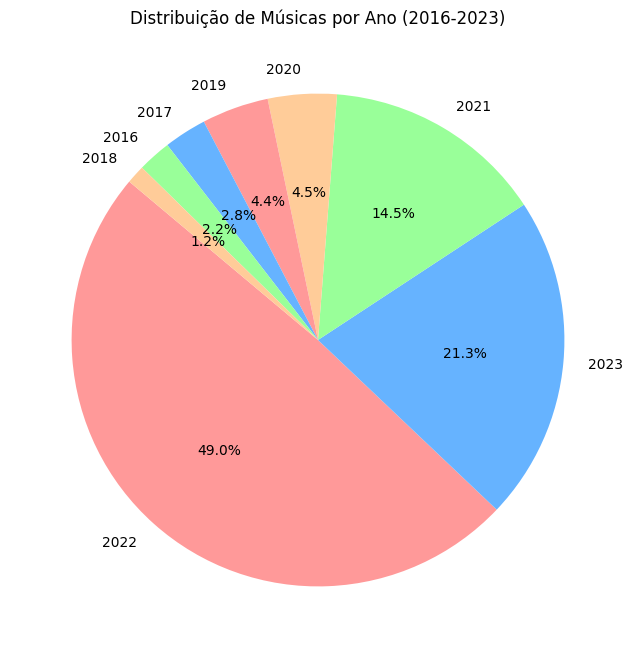

In [11]:
dados_filtrados = df[(df['released_year'] >= 2016) & (df['released_year'] <= 2023)]

frequencia_anos = dados_filtrados['released_year'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_anos, labels=frequencia_anos.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Configurações do gráfico
plt.title('Distribuição de Músicas por Ano (2016-2023)')
plt.show()

# Gráfico que mostra as músicas que mais vezes foram ouvidas no Spotify (dentre as mais escutadas do ano de 2023)

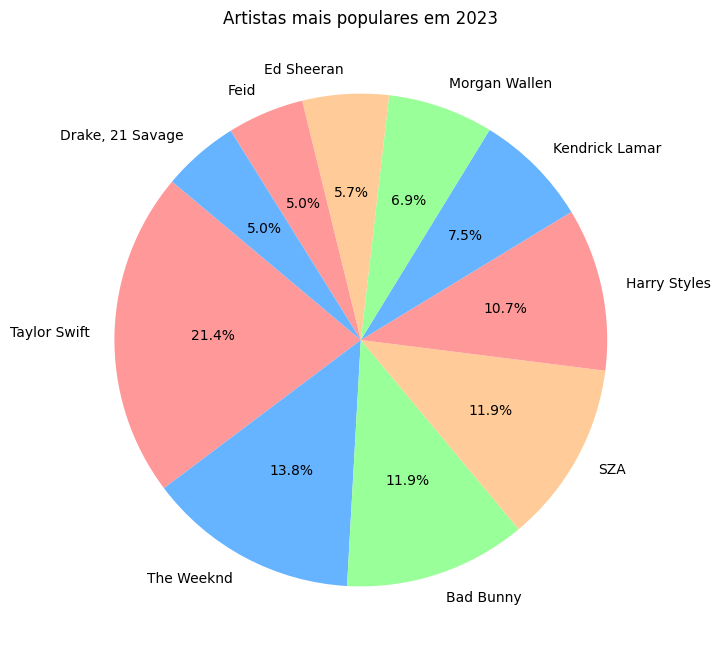

In [12]:
frequencia_artistas = artista.value_counts().head(10)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_artistas, labels=frequencia_artistas.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Configurações do gráfico
plt.title('Artistas mais populares em 2023')
plt.show()

# Gráfico que mostra os artistas mais populares de 2023

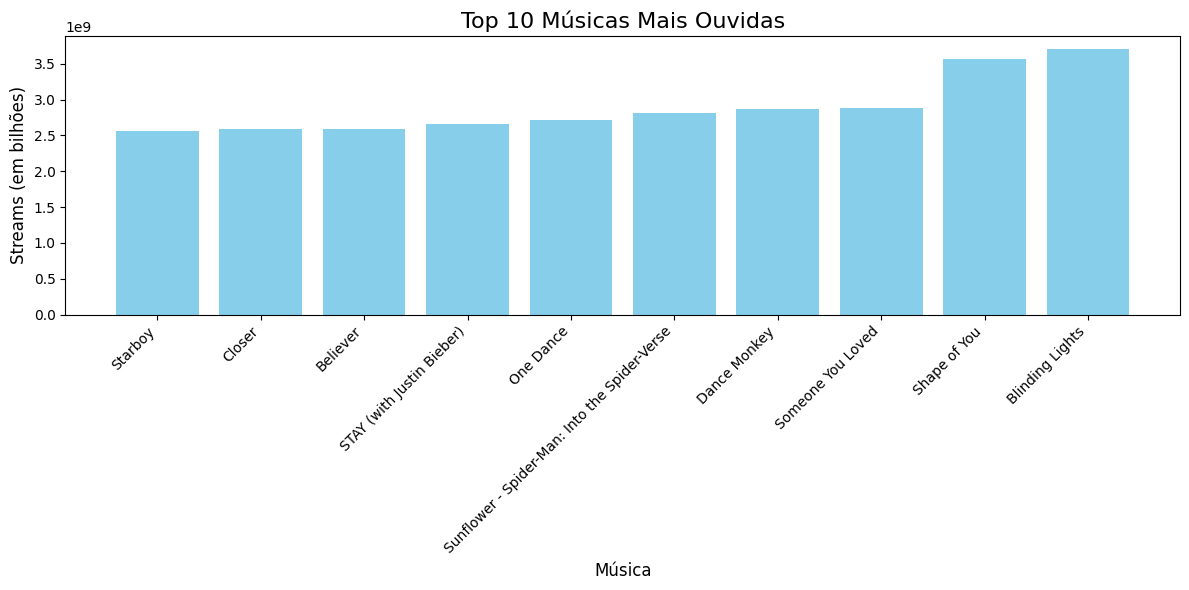

In [13]:
# Organizando explicitamente os nomes e popularidade
top_10_musicas = df.head(10).iloc[::-1]

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(top_10_musicas['track_name'], top_10_musicas['streams'], color='skyblue')

# Configurar título e eixos
plt.title('Top 10 Músicas Mais Ouvidas', fontsize=16)
plt.xlabel('Música', fontsize=12)
plt.ylabel('Streams (em bilhões)', fontsize=12)

# Rotacionar rótulos
plt.xticks(rotation=45, ha='right')

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()

# Gráfico que mostra as músicas mais escutadas no geral, dentre as mais ouvidas de 2023

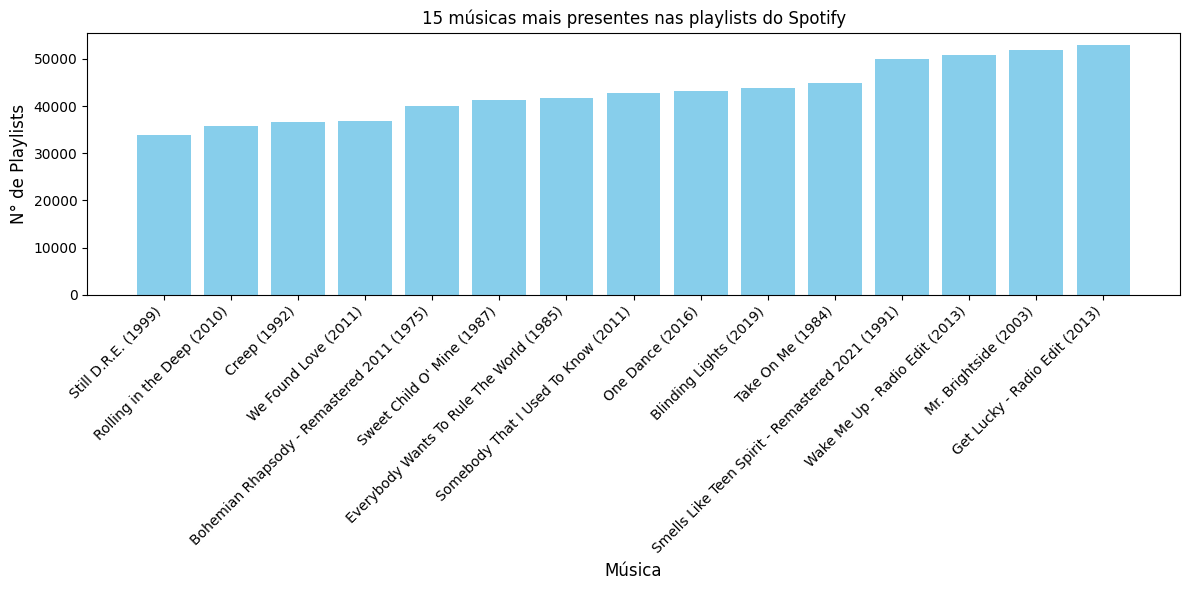

In [14]:
copia = df.copy()

# Ordenando a cópia pelo número de vezes em que a música aparece em uma playlist do Spotify
copia['in_spotify_playlists'] = copia['in_spotify_playlists'].fillna(0).astype(int)
copia = copia.sort_values(by='in_spotify_playlists', ascending=False)

top_15_spotify = copia.head(15).iloc[::-1]

# Adicionando o ano de lançamento juntamente ao nome da música
top_15_spotify['nome_com_ano'] = top_15_spotify['track_name'] + ' (' + top_15_spotify['released_year'].astype(str) + ')'

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(top_15_spotify['nome_com_ano'], top_15_spotify['in_spotify_playlists'], color='skyblue')

# Configurar título e eixos
plt.title('15 músicas mais presentes nas playlists do Spotify', fontsize=12)
plt.xlabel('Música', fontsize=12)
plt.ylabel('N° de Playlists', fontsize=12)

# Rotacionar rótulos
plt.xticks(rotation=45, ha='right')

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()

# Gráfico que mostra as 15 músicas mais presentes nas playlists do Spotify

In [ ]:
# A partir daqui, cada gráfico representa as músicas mais ouvidas dentre os artistas favoritos dos integrantes do nosso grupo.

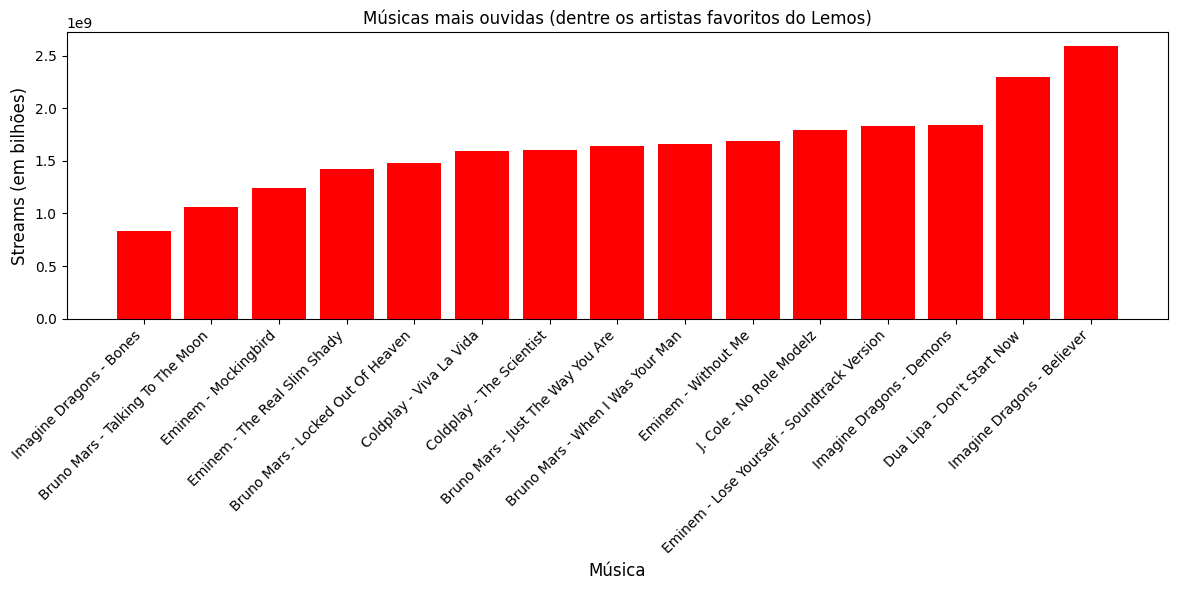

In [15]:
# Músicas mais ouvidas dos artistas favoritos do Lemos

lemos_artistas = ['Dua Lipa', 'Imagine Dragons', 'Eminem', 'Coldplay', 'J. Cole', 'Bruno Mars']

lemos = df[df['artist(s)_name'].isin(lemos_artistas) ]

lemos = lemos.head(15).iloc[::-1]

lemos['artista_+_musica'] = lemos['artist(s)_name'] + ' - ' + lemos['track_name']
# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(lemos['artista_+_musica'], lemos['streams'], color='red')

# Configurar título e eixos
plt.title('Músicas mais ouvidas (dentre os artistas favoritos do Lemos)', fontsize=12)
plt.xlabel('Música', fontsize=12)
plt.ylabel('Streams (em bilhões)', fontsize=12)

# Rotacionar rótulos
plt.xticks(rotation=45, ha='right')

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()

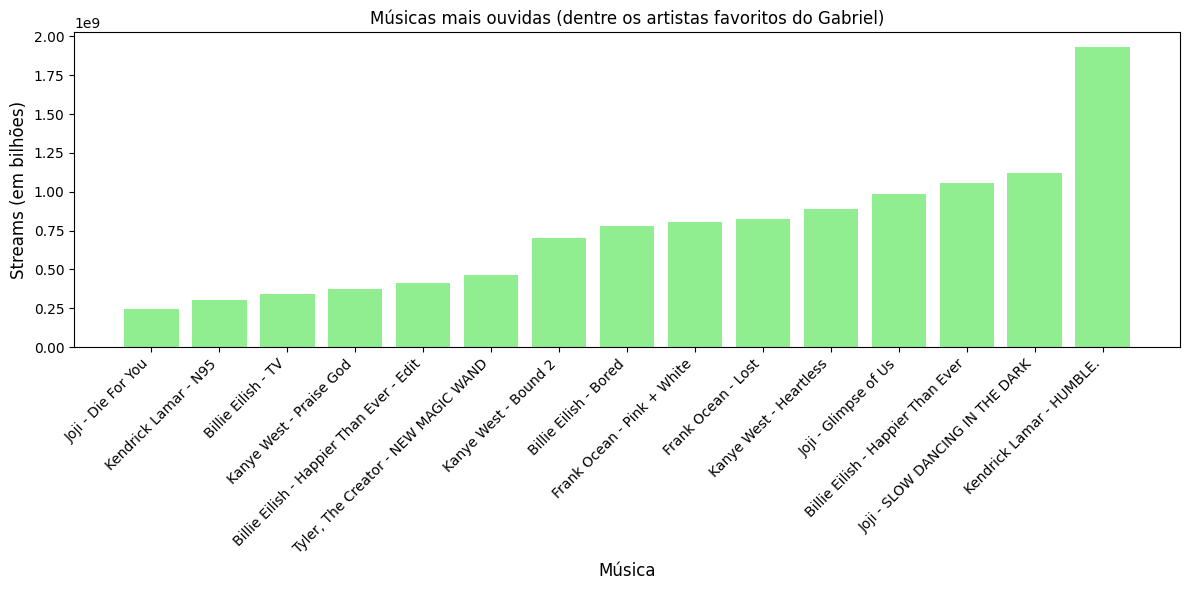

In [16]:
# Músicas mais ouvidas dos artistas favoritos do Gabriel

gb_artistas = ['Kendrick Lamar', 'Tyler, The Creator', 'Kanye West', 'Billie Eilish', 'Frank Ocean', 'Joji']

gb = df[df['artist(s)_name'].isin(gb_artistas) ]

gb = gb.head(15).iloc[::-1]

gb['artista_+_musica'] = gb['artist(s)_name'] + ' - ' + gb['track_name']
# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(gb['artista_+_musica'], gb['streams'], color='lightgreen')

# Configurar título e eixos
plt.title('Músicas mais ouvidas (dentre os artistas favoritos do Gabriel)', fontsize=12)
plt.xlabel('Música', fontsize=12)
plt.ylabel('Streams (em bilhões)', fontsize=12)

# Rotacionar rótulos
plt.xticks(rotation=45, ha='right')

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()

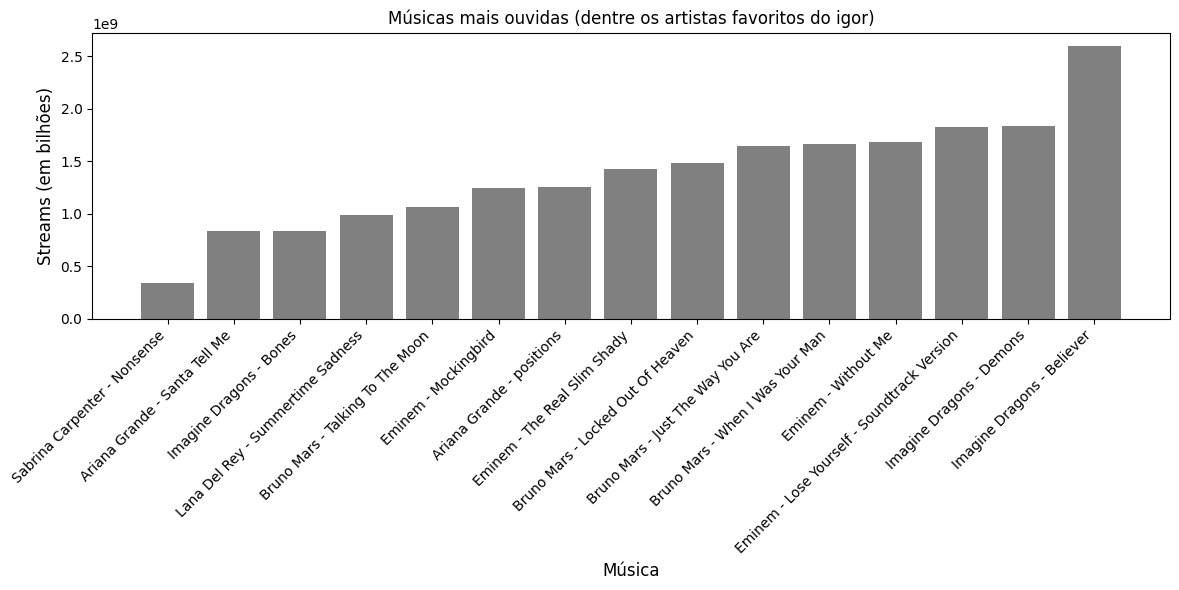

In [17]:
# Músicas mais ouvidas dos artistas favoritos do igor

igor_artistas = ['Sabrina Carpenter', 'Imagine Dragons', 'Eminem', 'Lana Del Rey', 'Ariana Grande', 'Bruno Mars']

igor = df[df['artist(s)_name'].isin(igor_artistas) ]

igor = igor.head(15).iloc[::-1]

igor['artista_+_musica'] = igor['artist(s)_name'] + ' - ' + igor['track_name']
# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(igor['artista_+_musica'], igor['streams'], color='grey')

# Configurar título e eixos
plt.title('Músicas mais ouvidas (dentre os artistas favoritos do igor)', fontsize=12)
plt.xlabel('Música', fontsize=12)
plt.ylabel('Streams (em bilhões)', fontsize=12)
# Rotacionar rótulos
plt.xticks(rotation=45, ha='right')

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()

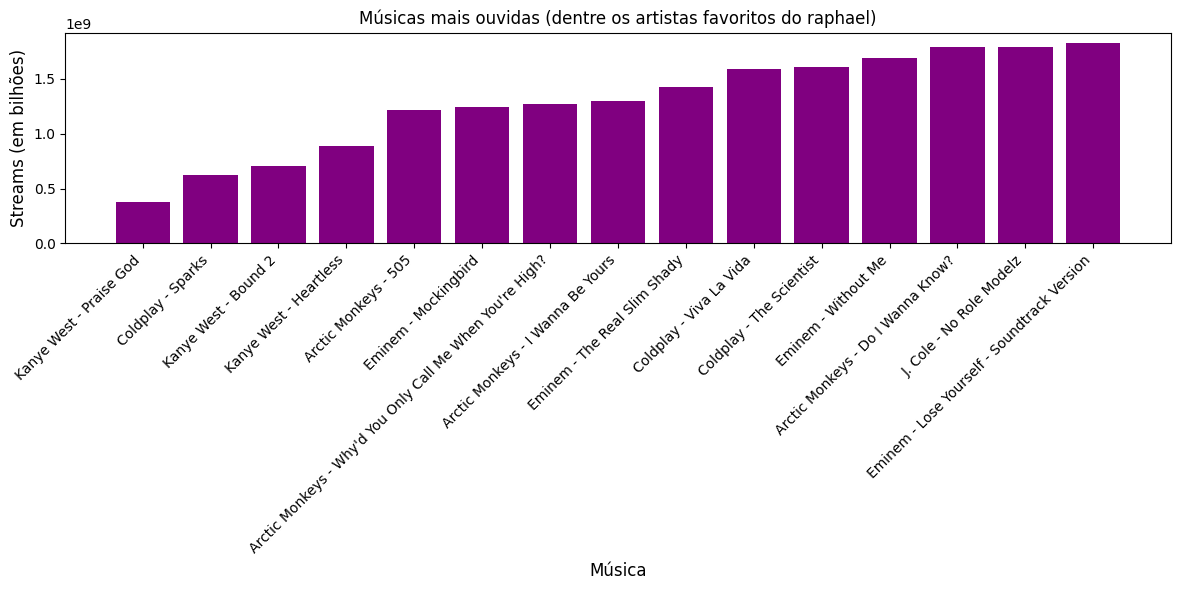

In [18]:
# Músicas mais ouvidas dos artistas favoritos do raphael

raphael_artistas = ['Rihanna', 'Arctic Monkeys', 'Eminem', 'Coldplay', 'J. Cole', 'Kanye West']

raphael = df[df['artist(s)_name'].isin(raphael_artistas) ]

raphael = raphael.head(15).iloc[::-1]

raphael['artista_+_musica'] = raphael['artist(s)_name'] + ' - ' + raphael['track_name']
# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(raphael['artista_+_musica'], raphael['streams'], color='purple')

# Configurar título e eixos
plt.title('Músicas mais ouvidas (dentre os artistas favoritos do raphael)', fontsize=12)
plt.xlabel('Música', fontsize=12)
plt.ylabel('Streams (em bilhões)', fontsize=12)

# Rotacionar rótulos
plt.xticks(rotation=45, ha='right')

# Ajustar layout e exibir gráfico
plt.tight_layout()
plt.show()